In [1]:
# import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
#get zipcodes
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )
#get service districts, nevermind, service districts are lame

# districts = gpd.read_file('../data/Service Districts (GIS).geojson')
# print(districts.crs)
# districts.head()

EPSG:4326


,area_sq_mi,name,objectid,geometry
0,198,Urban Services District,0,"MULTIPOLYGON (((-86.68681 36.28671, -86.68706 ..."
1,327,General Services District,4,"MULTIPOLYGON (((-86.56776 36.03424, -86.56783 ..."


In [7]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

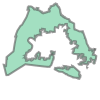

In [12]:
districts.loc[0, 'geometry']
districts.loc[1, 'geometry']

<Axes: >

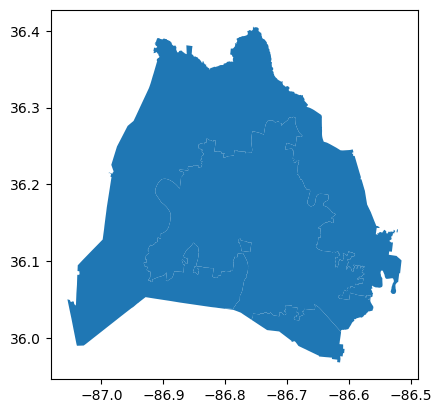

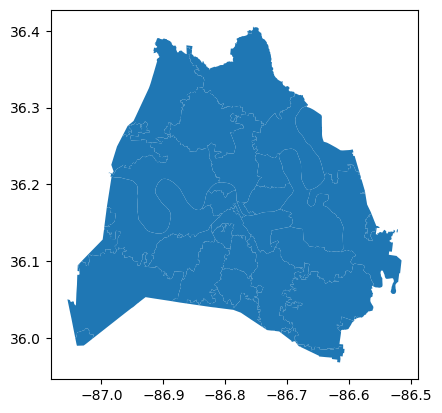

In [26]:
districts.plot()
zipcodes.plot()

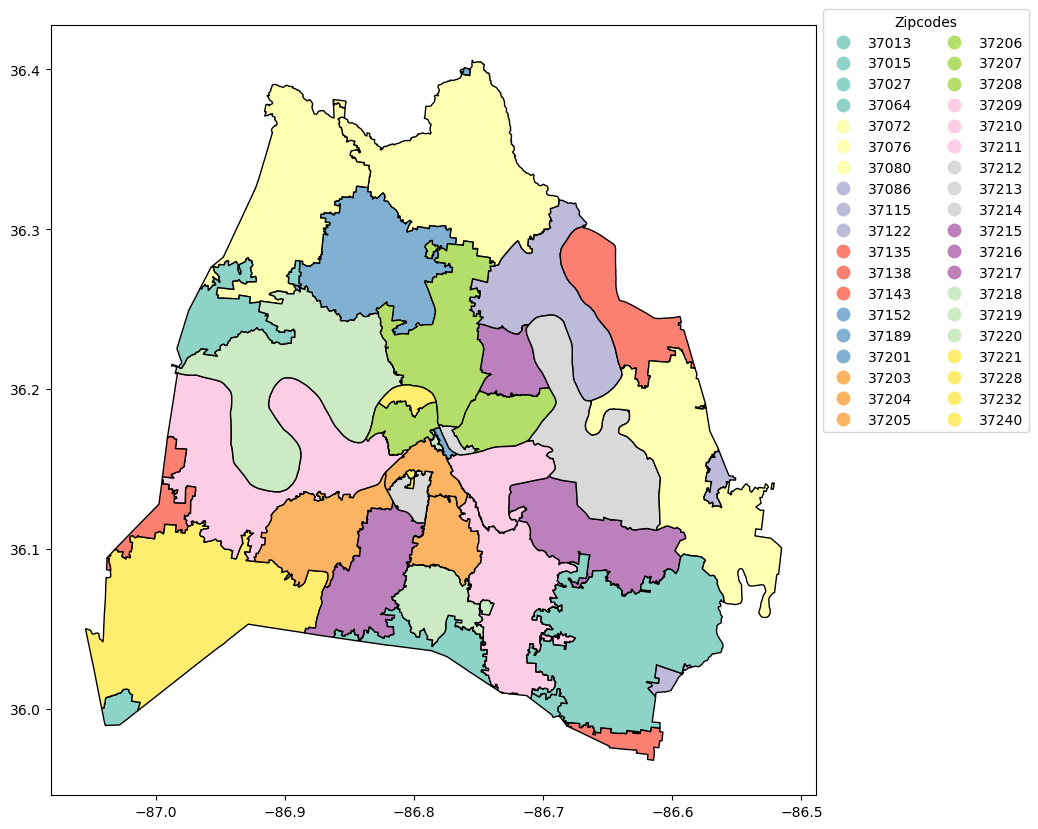

In [30]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [25]:
#911 calls seems too big to work with
# calls = pd.read_csv('../data/911calls.geojson')
# print(calls.shape)
# calls.head(3)

# lets do art
art = pd.read_csv('../data/art.csv')
print(art.shape)
art.head(3)



(162, 10)


,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)"
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)"


In [31]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              162 non-null    object 
 1   Artist Last Name   162 non-null    object 
 2   Artist First Name  157 non-null    object 
 3   Location           162 non-null    object 
 4   Medium             160 non-null    object 
 5   Type               162 non-null    object 
 6   Description        105 non-null    object 
 7   Latitude           162 non-null    float64
 8   Longitude          162 non-null    float64
 9   Mapped Location    162 non-null    object 
dtypes: float64(2), object(8)
memory usage: 12.8+ KB


In [32]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
art_geo = gpd.GeoDataFrame(art, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(art.Longitude, art.Latitude))

In [34]:
type(art_geo)

geopandas.geodataframe.GeoDataFrame

In [35]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [36]:
art_by_zip = gpd.sjoin(art_geo, zipcodes, predicate= 'within')

In [38]:
art_by_zip.head()

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491 36.16240),36,37201,NASHVILLE
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594 36.15961),36,37201,NASHVILLE
11,Orpheus and Eurydice,Kaskey,Ray,"1 Symphony Place, Nashville TN",Limestone,Sculpture,Relief sculpture above main entrance of Scherm...,36.16017,-86.77575,"(36.16017, -86.77575)",POINT (-86.77575 36.16017),36,37201,NASHVILLE
21,The Birth of Apollo,Eskridge,Casey,"1 Symphony Place, Nashville TN",Bronze sculpture as centerpiece of fountain,Sculpture,"Two figures topping a fountain, one with a lyr...",36.15993,-86.77611,"(36.15993, -86.77611)",POINT (-86.77611 36.15993),36,37201,NASHVILLE
24,The Recording Angel,Flack,Audrey,"1 Symphony Place, Nashville TN",Bronze,Sculpture,Bronze angel holding a fountain pen and tablet,36.15920,-86.77571,"(36.1592, -86.77571)",POINT (-86.77571 36.15920),36,37201,NASHVILLE


In [39]:
art_by_zip['zip'].value_counts()

zip
37219    33
37203    25
37201    21
37210    11
37212    10
37205    10
37206     9
37208     7
37214     6
37221     6
37209     4
37204     4
37115     3
37240     2
37213     2
37215     2
37207     2
37211     2
37216     2
37076     1
Name: count, dtype: int64

In [40]:
art_in_37219 = art_by_zip.loc[art_by_zip['zip'] == '37219']
art_in_37219.shape

(33, 14)

In [41]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

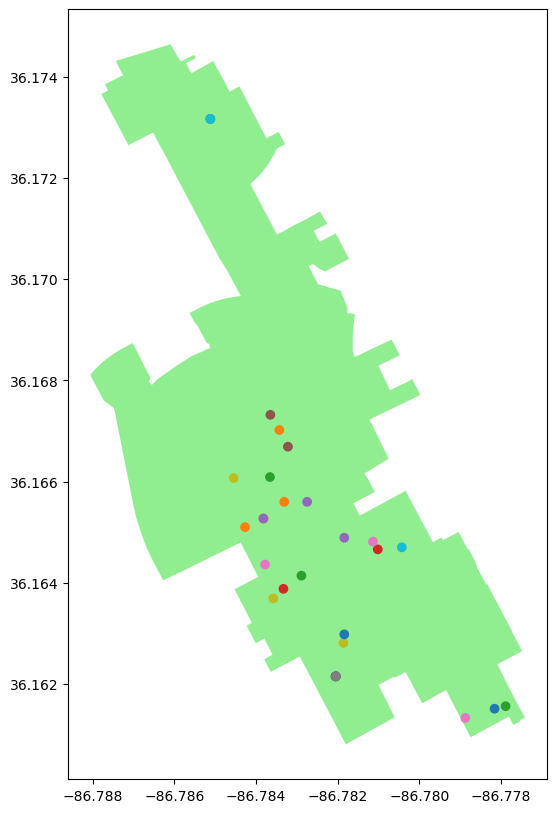

In [42]:
ax = polygon37219.plot(figsize = (8, 10), color = 'lightgreen')
art_in_37219.plot( ax = ax, column = 'Medium');
plt.show();

In [47]:
polygon37219.geometry.centroid

C:\Users\seanm\AppData\Local\Temp\ipykernel_25844\226734311.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37219.geometry.centroid


24    POINT (-86.78317 36.16682)
dtype: geometry

In [61]:
center = polygon37219.geometry.centroid[24]
print(center)

POINT (-86.783173370701 36.16681838008157)


C:\Users\seanm\AppData\Local\Temp\ipykernel_25844\1179354559.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37219.geometry.centroid[24]


In [62]:
area_center = [center.y, center.x]
print(area_center)

[36.16681838008157, -86.783173370701]


In [65]:
map_37219 = folium.Map(location = area_center, zoom_start = 12)
map_37219

In [66]:
i = 0
for row_index, row_values in art_in_37219.iterrows():
    if i <3:
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('---------------------')
        i+=1
        

index is 4
values are:
 
Title                                                     Anticipation
Artist Last Name                                                 Faxon
Artist First Name                                              Russell
Location                            505 Deaderick Street, Nashville TN
Medium                                                Cold cast bronze
Type                                                         Sculpture
Description          A statue of a woman with legs crossed sitting ...
Latitude                                                      36.16489
Longitude                                                    -86.78184
Mapped Location                                  (36.16489, -86.78184)
geometry                                    POINT (-86.78184 36.16489)
index_right                                                         24
zip                                                              37219
po_name                                             

In [95]:
map_37219 = folium.Map(location = area_center, zoom_start=12)

folium.GeoJson(polygon37219).add_to(map_37219)

for row_index, row_values in art_in_37219.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title'] + '<br>' 'By,  ' + str(row_values['Artist First Name']) + '  ' + str(row_values['Artist Last Name']) + '  Medium: ' + str(row_values['Medium']))
    icon = folium.Icon(color="blue",icon="eye",prefix='fa')
    
    # popContent = (str(row_values['Title'] + ', By,  ' + str(row_values['Artist First Name']) + '  ' + str(row_values['Artist Last Name']) + '  Medium: ' + str(row_values['Medium'])))
    # iframe = folium.IFrame(popContent)
    # popup1 = folium.Popup(iframe, minwidth=1000,max_width=1000)
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(map_37219)
map_37219.save('../maps/map37207.html')

map_37219